1. IMPORTACION DE LIBRERIAS

In [ ]:
!pip install keras
!pip install easyocr
import easyocr

import keras

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
from google.colab.patches import cv2_imshow
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
import time
from PIL import Image
import pandas as pd

from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input


from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adam,SGD, RMSprop 
from google.colab import drive
from tensorflow.keras.models import load_model

import keras.backend as K
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.metrics import f1_score 
from keras import optimizers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

from sklearn.metrics import classification_report


Mounted at /content/drive/
<class 'numpy.ndarray'>
(800, 1200)


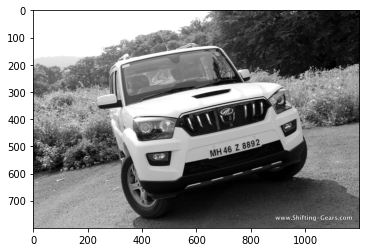

In [ ]:
drive.mount('/content/drive/')

img_array = cv2.imread("/content/drive/MyDrive/placas1/licensed_car44.jpeg",  cv2.IMREAD_GRAYSCALE) #categorias

plt.imshow(img_array, cmap = "gray")

print(type(img_array))

print(img_array.shape)


2. LECTURA DE DATOS DE LAS IMAGENES ETIQUETADAS POSICION DE BOXES DE LAS PLACAS

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/placas1/indian_license_plates.csv")

df["image_name"] = df["image_name"] + ".jpeg"

df.drop(["image_width", "image_height"], axis=1, inplace=True)

df


,image_name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.jpeg,0.722084,0.587983,0.868486,0.688841
1,licensed_car1.jpeg,0.161943,0.850780,0.582996,1.000000
2,licensed_car2.jpeg,0.082000,0.697452,0.230000,0.828025
3,licensed_car3.jpeg,0.434000,0.667377,0.718000,0.765458
4,licensed_car4.jpeg,0.208791,0.390764,0.865135,0.984014
...,...,...,...,...,...
232,licensed_car232.jpeg,0.344000,0.609290,0.706000,0.778689
233,licensed_car233.jpeg,0.368000,0.453453,0.616000,0.618619
234,licensed_car234.jpeg,0.334000,0.608434,0.628000,0.768072
235,licensed_car235.jpeg,0.295222,0.601208,0.441980,0.719033


3. MUESTRA ALEATORIA

4. MONTAJE DE ARCHIVOS DESDE GOOGLE DRIVE

5. CARGA DE IMAGEN DE PRUEBA PARA TEST

<class 'numpy.ndarray'>
(287, 496)


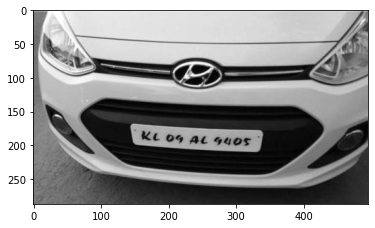

In [ ]:
img_array = cv2.imread("/content/drive/MyDrive/placas1/licensed_car120.jpeg",  cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array, cmap = "gray")

print(type(img_array))

print(img_array.shape)


6. NORMALIZACION DE PARAMETROS DE IMAGEN- misma resolucion-mismos canales de color, en este caso [224 224 3] por el modelo VGG16 usado inicialmente

In [ ]:
WIDTH = 224 

HEIGHT = 224 

CHANNEL = 3 

def show_img(index):

    image = cv2.imread("/content/drive/MyDrive/placas1/" + df["image_name"].iloc[index])

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = cv2.resize(image, dsize=(WIDTH, HEIGHT))
    
    tx = int(df["top_x"].iloc[index] * WIDTH)

    ty = int(df["top_y"].iloc[index] * HEIGHT)

    bx = int(df["bottom_x"].iloc[index] * WIDTH)

    by = int(df["bottom_y"].iloc[index] * HEIGHT)

    image = cv2.rectangle(image, (tx, ty), (bx, by), (0, 0, 255), 1)

    print(type(image))

    print(image.shape)

    plt.imshow(image)

    plt.show()

<class 'numpy.ndarray'>
(224, 224, 3)


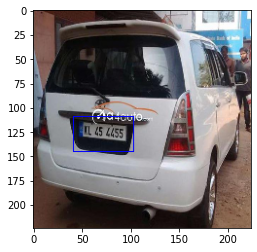

In [ ]:
show_img(32)

7. MODELO 1

7.1. SEPARACION DE DATA DE ENTRENAMIENTO Y DATA DE PRUEBA

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1) #keras class 10% for validation

train_generator = datagen.flow_from_dataframe(

    df,

    directory="/content/drive/MyDrive/placas1/",

    x_col="image_name",

    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],

    target_size=(WIDTH, HEIGHT),

    batch_size=32, 

    class_mode="other",

    subset="training")

validation_generator = datagen.flow_from_dataframe(

    df,

    directory="/content/drive/MyDrive/placas1/",

    x_col="image_name",

    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],

    target_size=(WIDTH, HEIGHT),

    batch_size=32, 

    class_mode="other",

    subset="validation")


Found 214 validated image filenames.
Found 23 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

In [ ]:
train_generator

In [ ]:
type(train_generator)

keras.preprocessing.image.DataFrameIterator

In [ ]:
validation_generator

In [ ]:
type(validation_generator)

keras.preprocessing.image.DataFrameIterator

7.2. MODELO AHORA SI

1 MODELO SIMPLE - TRANSFER LEARNING

Usando un modelo pre-entrenado Imagenet con los parametros de imagen normalizados

Modelo VGG16:VDCN large scale image

[1] Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.


In [ ]:
#modelo 1

model = Sequential()

model.add(VGG16(weights="imagenet", #trainning by imagenet
                
                include_top=False, #not include default shape (224,224,3)

                input_shape=(HEIGHT, WIDTH, CHANNEL))) 

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='mse', 
              metrics=['acc']) 

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 17,938,756
Trainable params: 3,224,068
Non-

In [ ]:
#cargando modelo guardado 

PARAMETROS DEL MODELO

OPTIMIZACION Y LOSS FUNCTION



To find the minimum amount of step count to cover all the batches, the following equations are necessary. Mathematically;

Step size=⌈Number of elements/Batch Size⌉
 


EJECUCION DEL ENTRENAMIENTO MODELO

In [ ]:
epochs = 20

checkpoint = ModelCheckpoint("model-epoch:{epoch:02d}-loss:{loss:.3f}-val_acc:{val_acc:.3f}-weights") 

callbacks = [checkpoint] #No modificar esta línea

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=epochs,
                    callbacks=[checkpoint])

Epoch 1/20
7/7 [==============================] - 156s 17s/step - loss: 0.0460 - acc: 0.4206 - val_loss: 0.0175 - val_acc: 0.5652
INFO:tensorflow:Assets written to: model-epoch:01-loss:0.046-val_acc:0.565-weights/assets
Epoch 2/20
7/7 [==============================] - 3s 391ms/step - loss: 0.0155 - acc: 0.6822 - val_loss: 0.0165 - val_acc: 0.6087
INFO:tensorflow:Assets written to: model-epoch:02-loss:0.016-val_acc:0.609-weights/assets
Epoch 3/20
7/7 [==============================] - 3s 408ms/step - loss: 0.0078 - acc: 0.7757 - val_loss: 0.0168 - val_acc: 0.7391
INFO:tensorflow:Assets written to: model-epoch:03-loss:0.008-val_acc:0.739-weights/assets
Epoch 4/20
7/7 [==============================] - 3s 453ms/step - loss: 0.0052 - acc: 0.8785 - val_loss: 0.0116 - val_acc: 0.7391
INFO:tensorflow:Assets written to: model-epoch:04-loss:0.005-val_acc:0.739-weights/assets
Epoch 5/20
7/7 [==============================] - 3s 389ms/step - loss: 0.0033 - acc: 0.8972 - val_loss: 0.0132 - val_ac

7.3. ALMACENANDO MODELO ENTRENADO




8. RENDIMIENTO

In [ ]:
def show_results(log):
  val_loss = log.history['val_loss']
  val_acc = log.history['val_acc']
      
  fig, axes = plt.subplots(1, 2, figsize=(14,4))
  ax1, ax2 = axes
  ax1.plot(log.history['loss'], label='train')
  ax1.plot(val_loss, label='test')
  ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
  ax2.plot(log.history['acc'], label='train')
  ax2.plot(val_acc, label='test')
  ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
  
  for ax in axes: ax.legend()

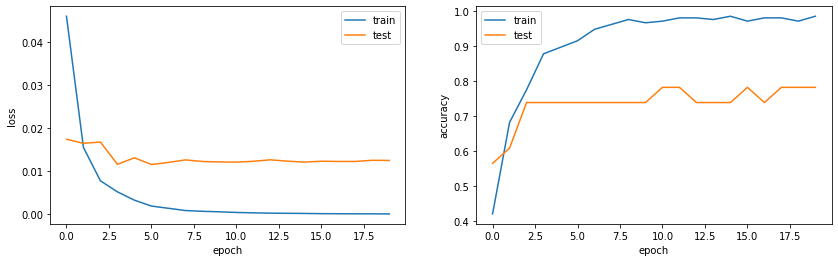

In [ ]:
show_results(history)

9. COMPROBACION

In [ ]:
model.evaluate(validation_generator)


1/1 [==============================] - 0s 485ms/step - loss: 0.0125 - acc: 0.7826


[0.012537270784378052, 0.782608687877655]

In [ ]:
lucky_test_samples = np.random.randint(0, len(df), 5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


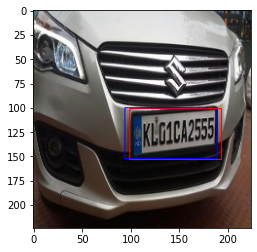

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


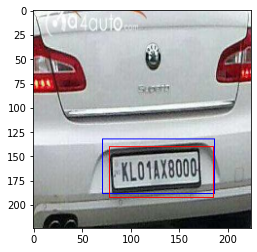

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


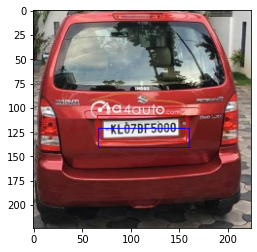

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


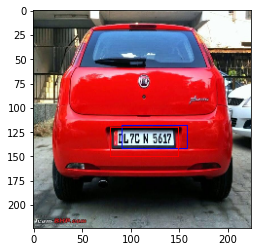

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


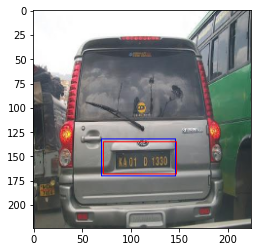

In [ ]:
for idx, row in df.iloc[lucky_test_samples].iterrows():  

    img = cv2.resize(cv2.imread("/content/drive/MyDrive/placas1/" + row[0]) / 255.0, dsize=(WIDTH, HEIGHT))

    y_hat = model.predict(img.reshape(1, WIDTH, HEIGHT, 3)).reshape(-1) * WIDTH
    
    xt, yt = y_hat[0], y_hat[1]

    xb, yb = y_hat[2], y_hat[3]
    
    img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)

    image = cv2.rectangle(img, (xt, yt), (xb, yb), (0, 0, 255), 1)

    image2 = cv2.rectangle(img, ((df["top_x"].iloc[idx]*WIDTH).astype(np.float32), (df["top_y"].iloc[idx]*HEIGHT).astype(np.float32)), ((df["bottom_x"].iloc[idx]*WIDTH).astype(np.float32), (df["bottom_y"].iloc[idx]*HEIGHT).astype(np.float32)), (255, 0, 0), 1)

    plt.imshow(image)

    plt.imshow(image2)

    plt.show()


10. PRUEBA CON IMAGEN NUEVA

In [ ]:
model_fin = load_model("model-epoch:50-loss:0.000-val_acc:0.783-weights")

OSError: ignored

In [ ]:
val_loss, val_acc = model_fin.evaluate(validation_generator)

print("Validation: Loss -> {:.4f} | Accuracy {:.4f}".format(val_loss, val_acc))

NameError: ignored

In [ ]:
true_top= []

true_bottom= []

predict_top = []

predict_bottom = []

for idx, row in df.iterrows():  

    img = cv2.resize(cv2.imread("/content/drive/MyDrive/placas1/" + row[0]) / 255.0, dsize=(WIDTH, HEIGHT))

    y_hat = model.predict(img.reshape(1, WIDTH, HEIGHT, 3)).reshape(-1) * WIDTH
    
    top_predict = [y_hat[0], y_hat[1]]

    bottom_predict = [y_hat[2], y_hat[3]]

    top_test = [df["top_x"].iloc[idx]*WIDTH, df["top_y"].iloc[idx]*HEIGHT]

    bottom_test = [df["bottom_x"].iloc[idx]*WIDTH, df["bottom_y"].iloc[idx]*HEIGHT]
    
    true_top.append(top_test)

    true_bottom.append(bottom_test)

    predict_top.append(top_predict)

    predict_bottom.append(bottom_predict)


In [ ]:
true_top

[[161.74689826302716, 131.7081545064376],
 [36.27530364372455, 190.5746102449887],
 [18.368, 156.2292993630573],
 [97.216, 149.49253731343276],
 [46.76923076923059, 87.53108348134975],
 [57.076923076922995, 145.52204176334092],
 [92.28312159709597, 118.64615384615368],
 [108.74181818181808, 103.44878957169456],
 [92.00977995110001, 101.63199999999985],
 [92.55745721271391, 88.9507246376811],
 [69.78193146417428, 77.28],
 [76.125, 110.1066319895967],
 [75.25, 95.77931034482742],
 [40.32, 93.12359550561783],
 [67.648, 87.06415094339603],
 [79.29715762273895, 120.02492211837995],
 [85.05591677503244, 138.58992805755398],
 [28.71794871794868, 132.1967213114753],
 [152.06504065040647, 108.86513994910938],
 [63.860718171925924, 79.99999999999997],
 [70.53617021276584, 106.3253333333332],
 [76.24937655860337, 1.092682926829088],
 [72.9166666666666, 110.68750000000003],
 [84.0, 92.53125],
 [60.480000000000004, 122.85872576177267],
 [101.58974358974358, 88.60444444444434],
 [68.32, 100.93827160

In [ ]:
true_bottom

[[194.5409429280397, 154.3004291845493],
 [130.5910931174089, 224.0],
 [51.52, 185.47770700636937],
 [160.832, 171.46268656716418],
 [193.79020979020976, 220.41918294849017],
 [140.53846153846152, 174.10672853828308],
 [180.5009074410163, 155.07692307692304],
 [161.28, 133.48230912476723],
 [127.42624286878552, 115.71199999999988],
 [131.4425427872861, 139.59420289855063],
 [147.239875389408, 122.64],
 [109.15625, 127.29258777633285],
 [152.95, 123.0712643678159],
 [99.37454545454534, 140.94382022471902],
 [161.28, 157.2226415094339],
 [149.62273901808777, 150.3800623052959],
 [142.43953185955783, 171.89448441246998],
 [89.50427350427336, 171.3661202185791],
 [197.1382113821138, 133.37404580152668],
 [180.85745375408035, 165.4736842105263],
 [169.19148936170208, 164.2666666666666],
 [142.7231920199501, 24.039024390243743],
 [142.0416666666666, 127.75],
 [166.8333333333332, 108.5],
 [160.90666666666658, 172.4986149584486],
 [155.43589743589735, 110.00888888888889],
 [170.61333333333314,

In [ ]:
predict_top

[[160.45636, 128.4408],
 [54.804688, 134.77116],
 [56.215492, 141.93164],
 [99.66914, 151.15524],
 [36.278202, 60.14119],
 [63.178295, 130.11592],
 [62.518158, 103.37873],
 [81.977936, 89.41298],
 [78.997185, 93.259125],
 [89.35559, 117.29525],
 [59.90226, 89.73994],
 [67.15708, 108.39792],
 [76.196556, 90.28415],
 [41.16956, 105.21069],
 [73.795525, 106.6892],
 [91.93837, 118.60652],
 [90.09175, 151.2679],
 [47.13806, 135.13852],
 [106.29925, 118.322525],
 [50.066734, 88.31791],
 [53.438015, 118.21298],
 [60.748314, 84.58125],
 [77.243034, 118.22264],
 [80.92249, 84.58638],
 [60.705086, 120.00666],
 [86.65711, 90.56568],
 [65.07781, 101.97219],
 [23.012657, 104.039894],
 [26.397812, 20.637436],
 [20.68616, 18.066456],
 [41.27152, 53.995186],
 [103.01375, 112.26687],
 [41.613655, 110.76341],
 [19.608013, 140.4402],
 [68.914734, 85.93667],
 [80.85028, 83.73224],
 [71.367935, 102.228745],
 [83.80005, 92.11252],
 [104.268906, 124.79734],
 [8.919747, 74.751495],
 [57.21036, 97.370804],
 [6

In [ ]:
predict_bottom

[[196.94661, 158.95189],
 [133.06242, 177.87308],
 [146.07774, 173.62935],
 [171.43599, 180.41953],
 [211.28133, 187.93802],
 [158.62495, 179.37416],
 [162.26631, 158.30983],
 [162.45415, 129.62599],
 [147.59285, 119.72998],
 [144.4917, 160.70547],
 [134.80054, 138.40234],
 [120.07803, 130.83078],
 [160.44038, 131.20673],
 [131.31757, 146.55054],
 [173.1364, 159.55263],
 [158.0113, 142.55267],
 [134.40388, 174.99112],
 [134.10197, 169.94122],
 [160.63924, 153.98575],
 [180.85617, 161.97278],
 [151.08945, 161.7797],
 [151.00024, 137.8371],
 [145.0126, 132.84131],
 [162.40204, 108.89765],
 [166.37775, 172.08466],
 [156.40941, 115.758766],
 [170.37517, 150.39868],
 [113.994316, 166.47348],
 [207.52988, 95.5723],
 [210.92435, 83.07136],
 [213.13539, 186.96461],
 [133.41583, 143.44495],
 [107.045685, 148.84988],
 [89.02685, 169.34981],
 [154.5067, 126.298676],
 [145.60916, 105.18176],
 [133.19489, 137.45964],
 [142.61237, 148.6325],
 [127.07755, 138.98973],
 [215.61496, 168.51942],
 [108.12

In [ ]:
true_top_f = np.concatenate(true_top, axis=0)

predict_top_f = np.concatenate(predict_top, axis=0)

In [ ]:
def round_values(values):
  return K.round(values)

def binary_accuracy(y_true, y_pred):
  return K.mean(K.equal(y_true, round_values(y_pred))).numpy()

In [ ]:
accuracy_calculated = binary_accuracy(true_top_f, predict_top_f)

print("Validation: Accuracy Calculated {:.4f}".format(accuracy_calculated))

Validation: Accuracy Calculated 0.0000


In [ ]:
predict_top_f = round_values(predict_top_f).numpy()

true_top_f.shape, predict_top_f.shape

((474,), (474,))

In [ ]:
#print(classification_report(true_top_f, predict_top_f))

12.RECONOCIMIENTO DE CARACTERES OCR

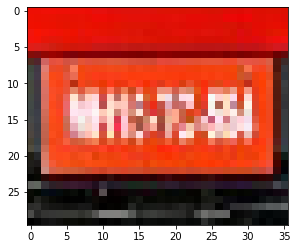

[([[3, 9], [33, 9], [33, 21], [3, 21]], 'MrN', 0.0018860141889752197)]


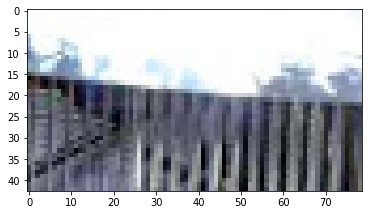

[]


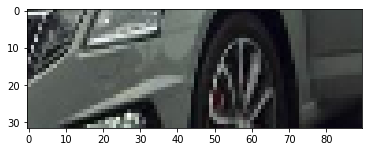

[]


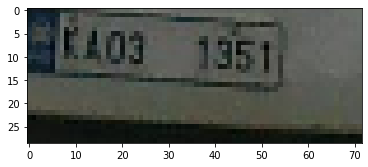

[([[5, 1], [29, 1], [29, 15], [5, 15]], '[4oj', 0.3215133845806122), ([[35, 3], [57, 3], [57, 17], [35, 17]], '1951', 0.3203682601451874)]


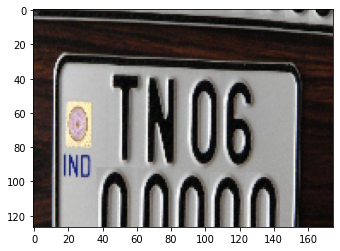

[([[15, 81], [37, 81], [37, 101], [15, 101]], 'Ind', 0.5488112477023904), ([[39, 33], [139, 33], [139, 99], [39, 99]], 'THOG', 0.31666892766952515)]


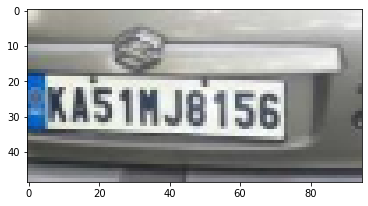

[([[2, 18], [75, 18], [75, 38], [2, 38]], 'M51jense', 0.1251974914727035)]


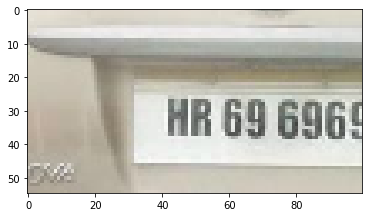

[([[39, 25], [99, 25], [99, 43], [39, 43]], 'HR 69 6965', 0.5952602353490514)]


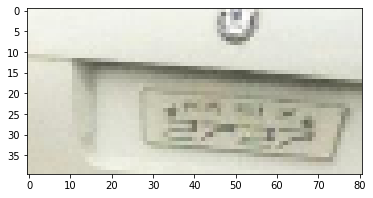

[]


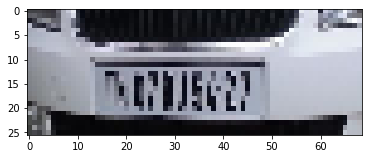

[([[15, 11], [49, 11], [49, 25], [15, 25]], 'Inmm', 0.20779693126678467)]


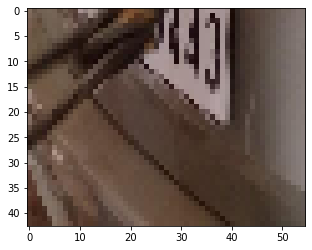

[]


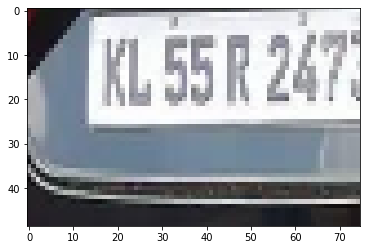

[([[10, 0], [75, 0], [75, 26], [10, 26]], 'KL55R247', 0.36665921160668064)]


In [ ]:
for idx, row in df.iterrows():
  img = cv2.resize(cv2.imread("/content/drive/MyDrive/placas1/" + row[0]) / 255.0, dsize=(WIDTH, HEIGHT))

  y_hat = model.predict(img.reshape(1, WIDTH, HEIGHT, 3)).reshape(-1) * WIDTH
    
  xt, yt = y_hat[0], y_hat[1]

  xb, yb = y_hat[2], y_hat[3]
    
  img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)

  #image = cv2.rectangle(img, (xt, yt), (xb, yb), (0, 0, 255), 1)

  #image2 = cv2.rectangle(img, ((df["top_x"].iloc[idx]*WIDTH).astype(np.float32), (df["top_y"].iloc[idx]*HEIGHT).astype(np.float32)), ((df["bottom_x"].iloc[idx]*WIDTH).astype(np.float32), (df["bottom_y"].iloc[idx]*HEIGHT).astype(np.float32)), (255, 0, 0), 1)
  # Cropping an image
  cropped_image = img[int(yt):int(yb), int(xt):int(xb)]

  plt.imshow(cropped_image)
  #plt.imshow(image2)
  plt.show() 
  cropped_image=cropped_image*255
  cropped_image=cropped_image.astype(np.uint8)

  cv2.imwrite("imager" + "-"+str(idx)+".jpg",cropped_image)
  IMAGE_PATH = "imager" + "-"+str(idx)+".jpg"
  reader = easyocr.Reader(['en'])
  result = reader.readtext(IMAGE_PATH)
  print(result)

  if idx==10:
    break
#

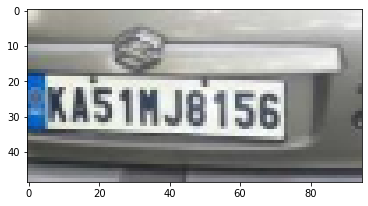

In [ ]:

# Mostrando imagen cortada
plt.imshow(cropped_image)
plt.show() 


In [ ]:
#cropped_image= cropped_image.astype(np.uint8)
cv2.imwrite('imager.jpg',cropped_image)
IMAGE_PATH = 'imager.jpg'
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result


[([[2, 18], [75, 18], [75, 38], [2, 38]], 'M51jense', 0.1251974914727035)]